In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)

In [5]:
df['country'] = df['country'].replace('Russian Federation', 'Russia')

In [6]:
df['country'] = df['country'].replace('United States', 'USA')

In [7]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [8]:
df['country'].nunique()

101

In [9]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [10]:
df['HDI for year'].isnull().sum()

19456

In [11]:
df['HDI for year'].unique()

array([  nan, 0.619, 0.656, 0.695, 0.722, 0.781, 0.783, 0.694, 0.705,
       0.731, 0.762, 0.775, 0.811, 0.818, 0.831, 0.833, 0.836, 0.632,
       0.605, 0.648, 0.721, 0.723, 0.728, 0.733, 0.865, 0.882, 0.898,
       0.927, 0.93 , 0.932, 0.933, 0.935, 0.764, 0.794, 0.815, 0.853,
       0.879, 0.881, 0.884, 0.885, 0.609, 0.64 , 0.778, 0.78 , 0.774,
       0.786, 0.727, 0.816, 0.819, 0.817, 0.821, 0.824, 0.7  , 0.716,
       0.753, 0.765, 0.793, 0.785, 0.683, 0.796, 0.798, 0.806, 0.851,
       0.874, 0.866, 0.883, 0.886, 0.889, 0.888, 0.89 , 0.644, 0.664,
       0.701, 0.71 , 0.711, 0.715, 0.724, 0.576, 0.608, 0.702, 0.737,
       0.742, 0.746, 0.752, 0.755, 0.686, 0.696, 0.713, 0.749, 0.773,
       0.779, 0.782, 0.827, 0.849, 0.861, 0.867, 0.892, 0.903, 0.909,
       0.91 , 0.912, 0.654, 0.699, 0.788, 0.814, 0.83 , 0.832, 0.573,
       0.596, 0.629, 0.679, 0.706, 0.718, 0.72 , 0.623, 0.652, 0.682,
       0.704, 0.75 , 0.756, 0.761, 0.766, 0.807, 0.653, 0.685, 0.73 ,
       0.776, 0.772,

In [12]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['HDI for year']] = imputer.fit_transform(df[['HDI for year']])

In [13]:
df['HDI for year']

0        0.776601
1        0.776601
2        0.776601
3        0.776601
4        0.776601
           ...   
27815    0.675000
27816    0.675000
27817    0.675000
27818    0.675000
27819    0.675000
Name: HDI for year, Length: 27820, dtype: float64

In [14]:
df.isna().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [15]:
df[df.duplicated()]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation


In [16]:
df.describe(include='number')

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.051192,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.776601,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.776601,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.776601,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [17]:
df = df[~((df['suicides_no'] == 0) & (df['suicides/100k pop'] == 0))]

In [18]:
df['suicide_rate'] = df['suicides_no'] / df['population'] * 100000
print(df['suicide_rate'].describe())

count    23539.000000
mean        15.146938
std         19.738849
min          0.017179
25%          2.784520
50%          8.256562
75%         19.557855
max        224.971879
Name: suicide_rate, dtype: float64


In [19]:
df['suicide_rate'].skew()

2.7985711969052534

In [20]:
numeric_columns=['suicides_no','population','suicides/100k pop','HDI for year','gdp_per_capita ($)','suicide_rate']
print('median:::')
print(df[numeric_columns].median())
print('mean:::')
print(df[numeric_columns].mean())

median:::
suicides_no               42.000000
population            588430.000000
suicides/100k pop          8.260000
HDI for year               0.776601
gdp_per_capita ($)      9667.000000
suicide_rate               8.256562
dtype: float64
mean:::
suicides_no           2.866910e+02
population            2.161400e+06
suicides/100k pop     1.514694e+01
HDI for year          7.773248e-01
gdp_per_capita ($)    1.722971e+04
suicide_rate          1.514694e+01
dtype: float64


In [21]:
numeric_columns = ['suicides_no','suicides/100k pop','HDI for year','gdp_per_capita ($)','suicide_rate']
df[numeric_columns].skew()

suicides_no           9.581045
suicides/100k pop     2.798565
HDI for year         -0.528444
gdp_per_capita ($)    1.856267
suicide_rate          2.798571
dtype: float64

In [22]:
numeric_columns = ['suicides_no','population','suicides/100k pop','HDI for year','gdp_per_capita ($)','suicide_rate']
df[numeric_columns].skew()

suicides_no           9.581045
population            4.129562
suicides/100k pop     2.798565
HDI for year         -0.528444
gdp_per_capita ($)    1.856267
suicide_rate          2.798571
dtype: float64

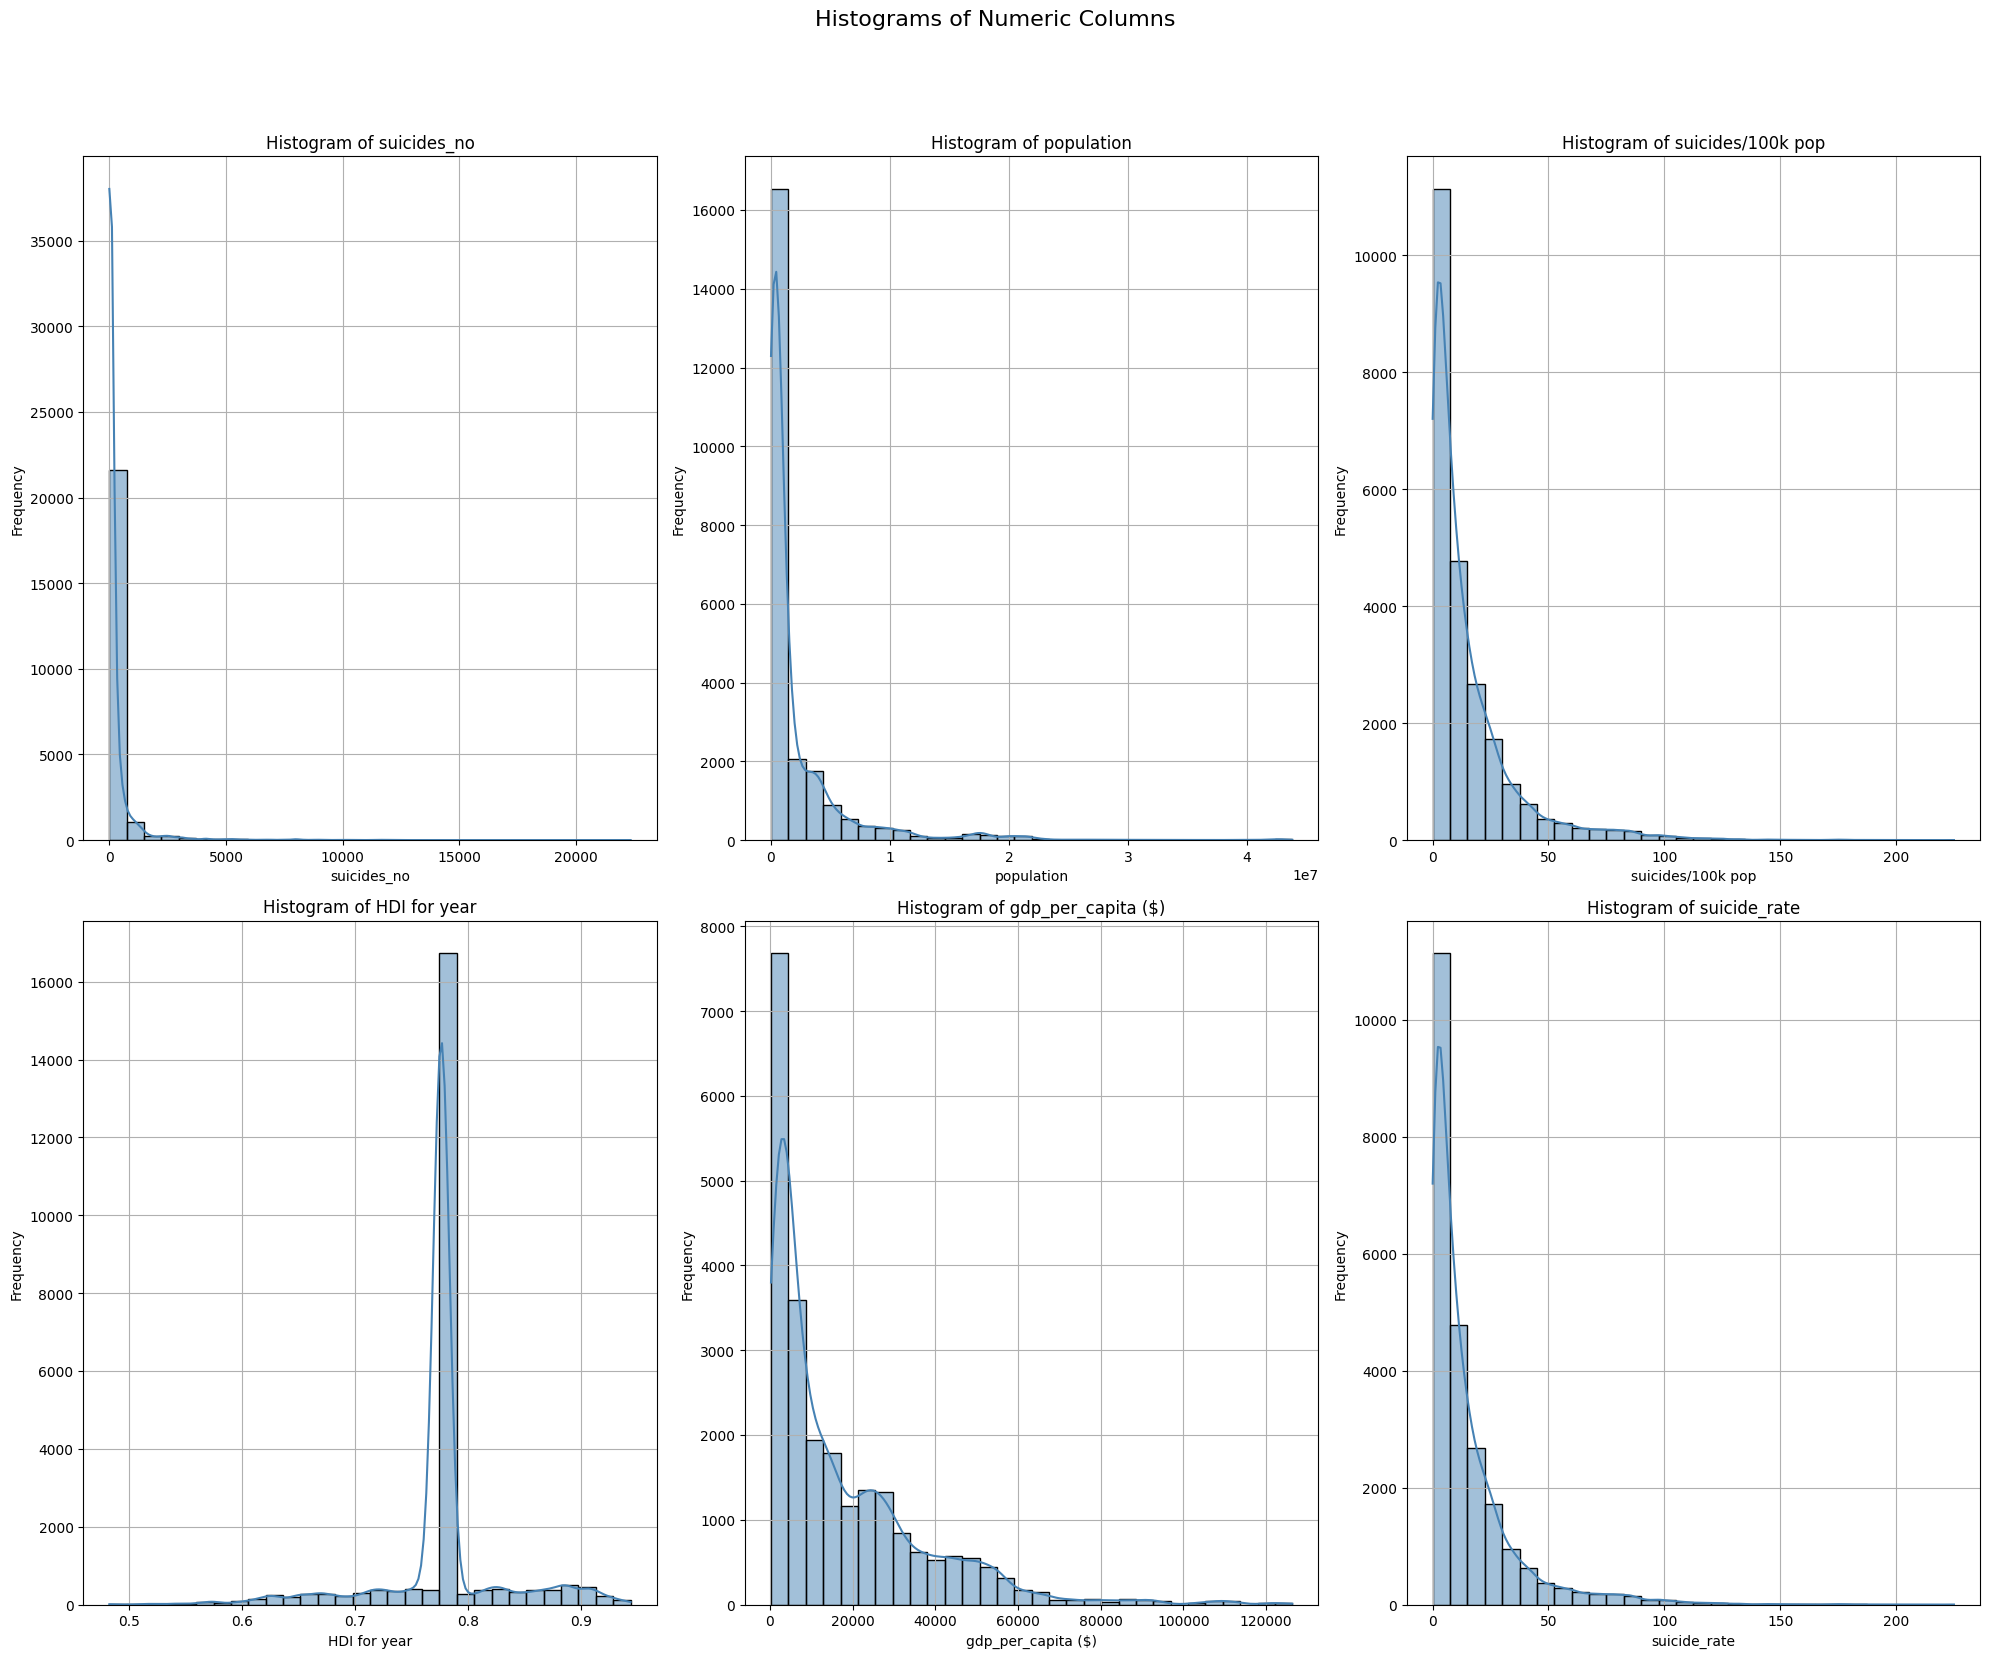

In [23]:
numeric_columns = ['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', 'suicide_rate']
fig, axes = plt.subplots(3, 3, figsize=(20, 25))
fig.suptitle('Histograms of Numeric Columns', fontsize=16)

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=30, kde=True, color='steelblue', ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


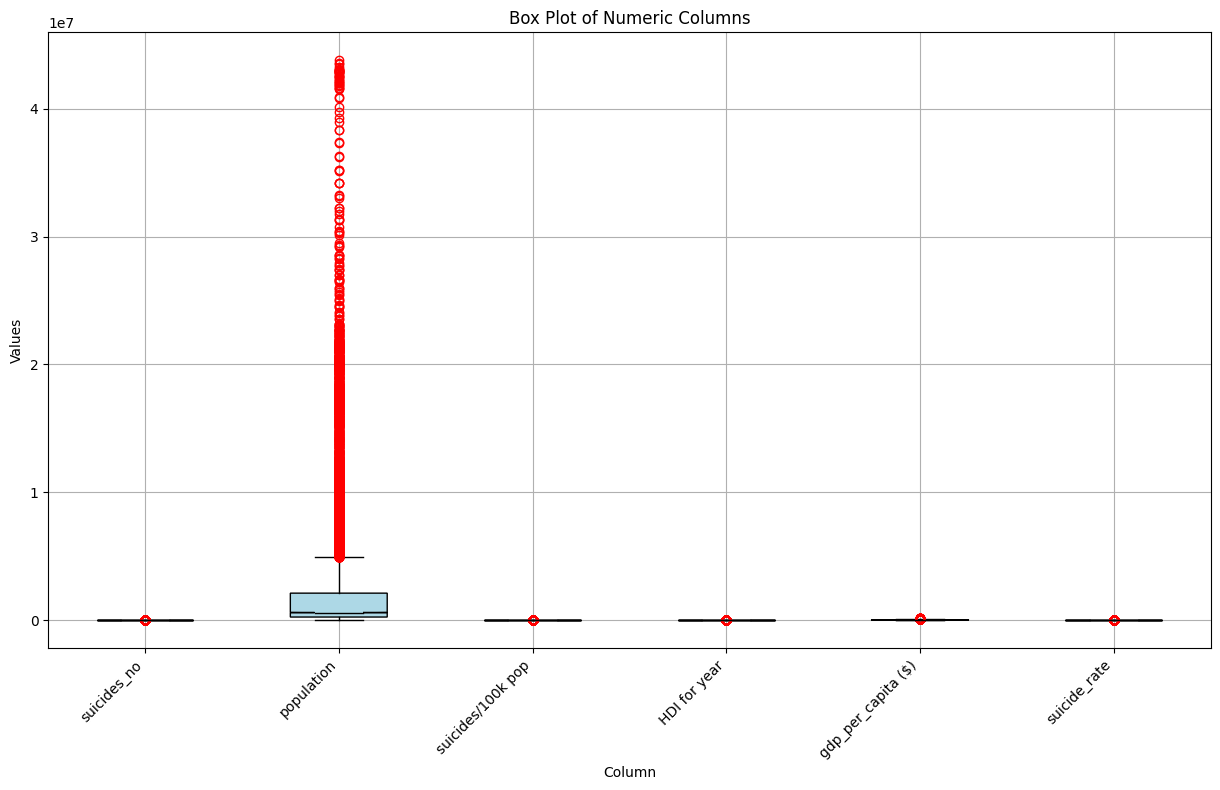

In [24]:
plt.figure(figsize=(15, 8))
plt.boxplot(df[numeric_columns].values, patch_artist=True, notch=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='red', markeredgecolor='red'),
            medianprops=dict(color='black'))
plt.title('Box Plot of Numeric Columns')
plt.xlabel('Column')
plt.ylabel('Values')
plt.xticks(range(1, len(numeric_columns) + 1), numeric_columns, rotation=45, ha='right')
plt.grid(True)
plt.show()

In [25]:
columns_to = ['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', 'suicide_rate']
columns_to_transform = ['population','gdp_per_capita ($)']
for column in columns_to_transform:
    df[column] = np.log(df[column])

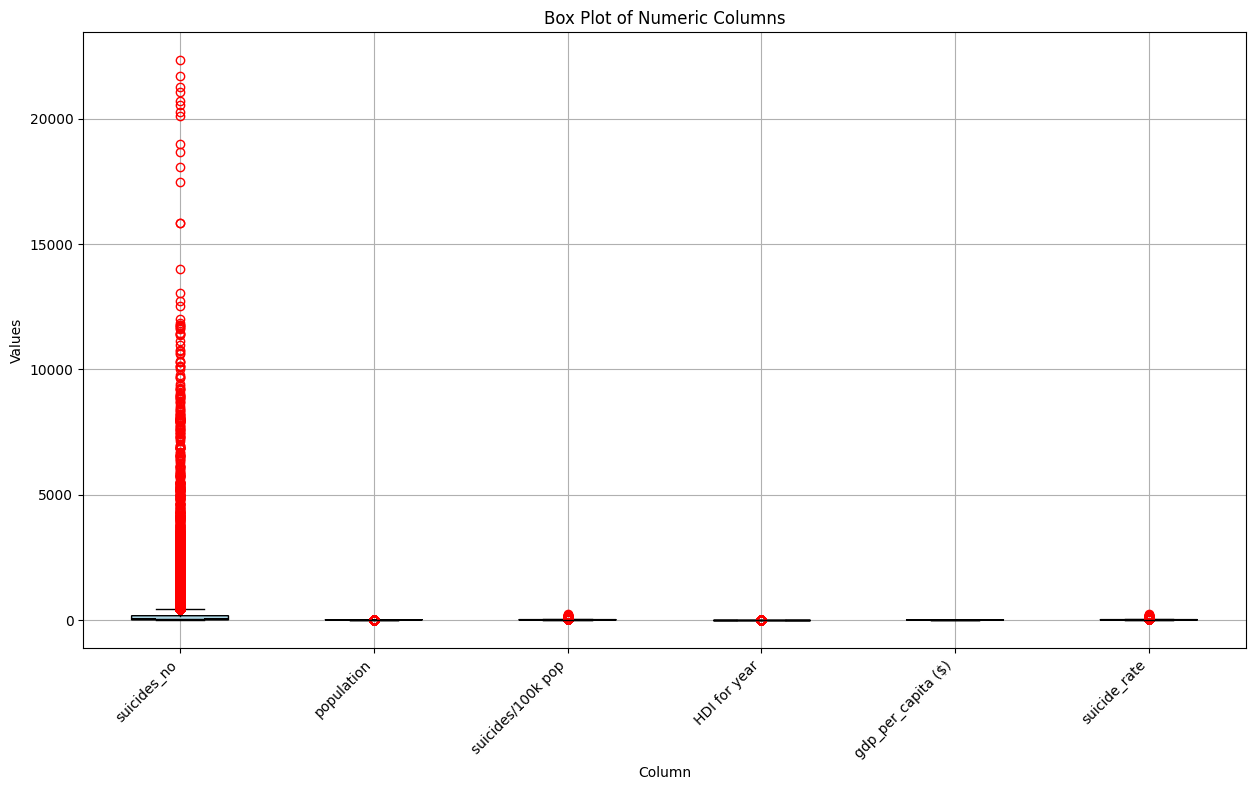

In [26]:
plt.figure(figsize=(15, 8))
plt.boxplot(df[numeric_columns].values, patch_artist=True, notch=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='red', markeredgecolor='red'),
            medianprops=dict(color='black'))
plt.title('Box Plot of Numeric Columns')
plt.xlabel('Column')
plt.ylabel('Values')
plt.xticks(range(1, len(numeric_columns) + 1), numeric_columns, rotation=45, ha='right')
plt.grid(True)
plt.show()

In [27]:
columns_to = ['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', 'suicide_rate']
for column in columns_to:
    print('min of',column,'is',df[column].min())
    print()

min of suicides_no is 1

min of population is 6.790097235513905

min of suicides/100k pop is 0.02

min of HDI for year is 0.483

min of gdp_per_capita ($) is 5.5254529391317835

min of suicide_rate is 0.017179178835251673



In [28]:
columns_to = ['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', 'suicide_rate']
for column in columns_to:
    print('max of',column,'is',df[column].max())
    print()

max of suicides_no is 22338

max of population is 17.595263409357734

max of suicides/100k pop is 224.97

max of HDI for year is 0.944

max of gdp_per_capita ($) is 11.746826941737362

max of suicide_rate is 224.97187851518564



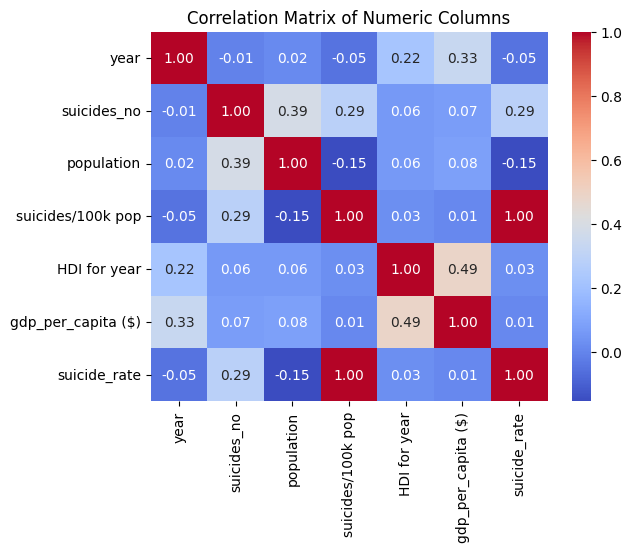

In [29]:
columns = ['year','suicides_no','population','suicides/100k pop','HDI for year','gdp_per_capita ($)','suicide_rate']
corr_matrix = df[columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [30]:
from scipy.stats import skew
original_skewness = df[numeric_columns].skew()

for column in numeric_columns:
    reduced_columns = numeric_columns.copy()
    reduced_columns.remove(column)
    reduced_skewness = df[reduced_columns].skew()
    print(f"Skewness without {column}:")
    print(reduced_skewness)


Skewness without suicides_no:
population           -0.282261
suicides/100k pop     2.798565
HDI for year         -0.528444
gdp_per_capita ($)   -0.288280
suicide_rate          2.798571
dtype: float64
Skewness without population:
suicides_no           9.581045
suicides/100k pop     2.798565
HDI for year         -0.528444
gdp_per_capita ($)   -0.288280
suicide_rate          2.798571
dtype: float64
Skewness without suicides/100k pop:
suicides_no           9.581045
population           -0.282261
HDI for year         -0.528444
gdp_per_capita ($)   -0.288280
suicide_rate          2.798571
dtype: float64
Skewness without HDI for year:
suicides_no           9.581045
population           -0.282261
suicides/100k pop     2.798565
gdp_per_capita ($)   -0.288280
suicide_rate          2.798571
dtype: float64
Skewness without gdp_per_capita ($):
suicides_no          9.581045
population          -0.282261
suicides/100k pop    2.798565
HDI for year        -0.528444
suicide_rate         2.798571
dtype: 

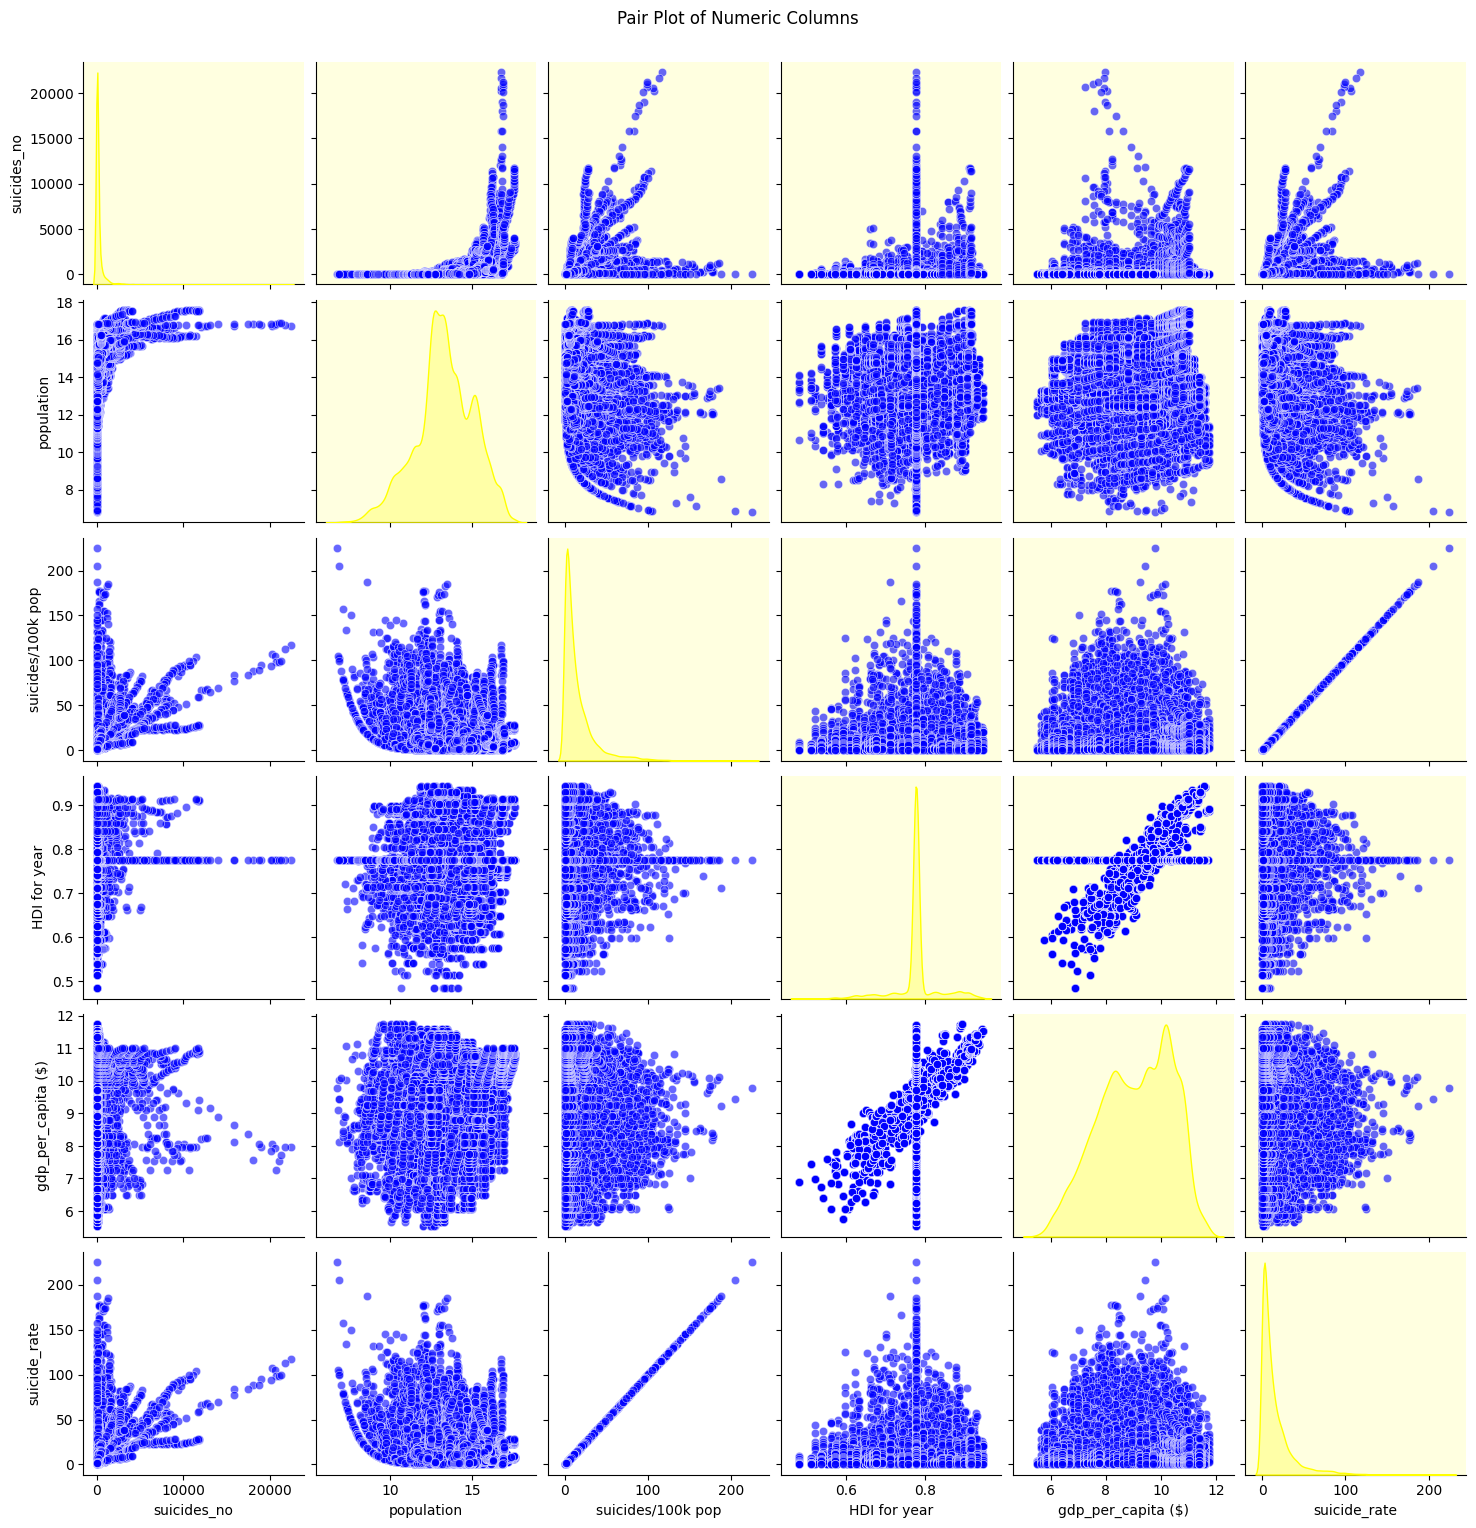

In [31]:
numeric_columns = ['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', 'suicide_rate']
g = sns.pairplot(df[numeric_columns], diag_kind='kde', plot_kws={'alpha': 0.6, 'color': 'blue'}, diag_kws={'color': 'yellow'})

for i, j in zip(*np.triu_indices_from(g.axes, 0)):
    g.axes[i, j].patch.set_facecolor('lightyellow')

plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()


In [32]:
continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Brazil': 'South America',
    'Bulgaria': 'Europe',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Europe',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Latvia': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Norway': 'Europe',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Republic of Korea': 'Asia',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and Grenadines': 'North America',
    'Serbia': 'Europe',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syria': 'Asia',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'Trinidad and Tobago': 'North America',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Venezuela': 'South America',
    'Vietnam': 'Asia'
}

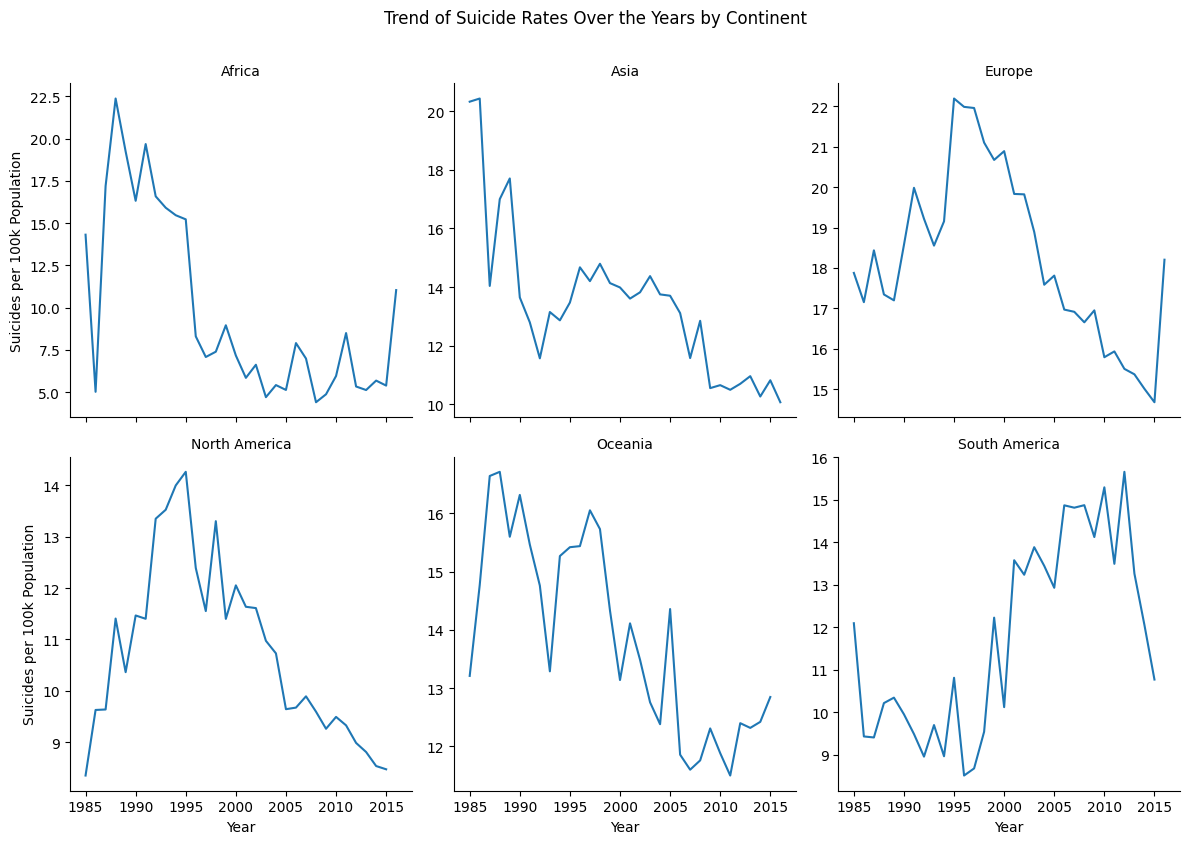

In [33]:
df['continent'] = df['country'].map(continent_mapping)

continent_trend = df.groupby(['year', 'continent'])['suicides/100k pop'].mean().reset_index()

g = sns.FacetGrid(continent_trend, col='continent', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'year', 'suicides/100k pop')
g.set_axis_labels('Year', 'Suicides per 100k Population')
g.set_titles('{col_name}')
g.fig.suptitle('Trend of Suicide Rates Over the Years by Continent', y=1.05)
plt.show()

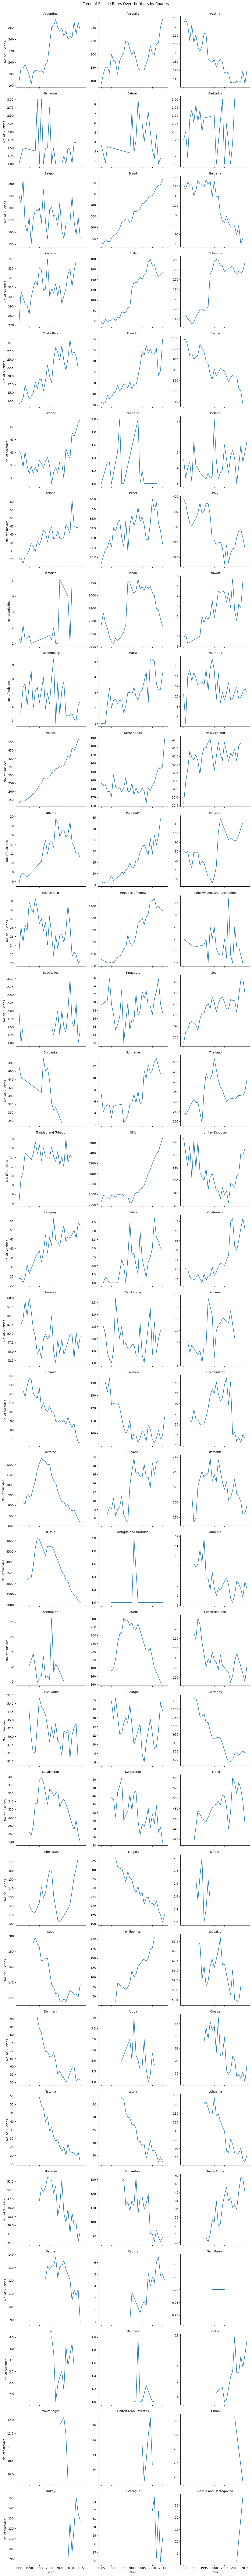

In [34]:
import warnings
warnings.filterwarnings('ignore')

df = df[~((df['suicides_no'] == 0) & (df['suicides/100k pop'] == 0))]
country_trend = df.groupby(['year', 'country'])['suicides_no'].mean().reset_index()

country_counts = country_trend['country'].value_counts()
countries_with_sufficient_data = country_counts[country_counts > 1].index
country_trend = country_trend[country_trend['country'].isin(countries_with_sufficient_data)]

g = sns.FacetGrid(country_trend, col='country', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'year', 'suicides_no')
g.set_axis_labels('Year', 'No. of Suicides')
g.set_titles('{col_name}')
g.fig.suptitle('Trend of Suicide Rates Over the Years by Country', y=0.95)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


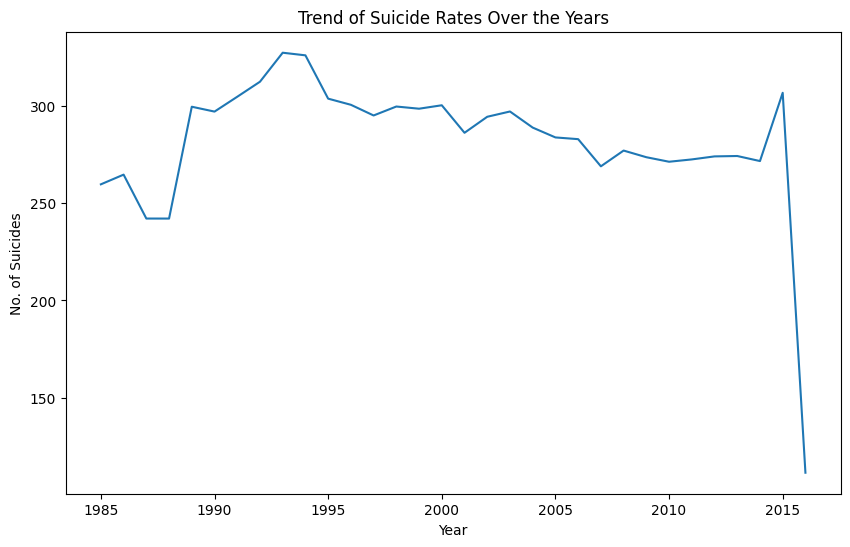

In [35]:
import warnings
warnings.filterwarnings('ignore')

df = df[~((df['suicides_no'] == 0) & (df['suicides/100k pop'] == 0))]

year_trend = df.groupby('year')['suicides_no'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=year_trend, x='year', y='suicides_no')

plt.xlabel('Year')
plt.ylabel('No. of Suicides')
plt.title('Trend of Suicide Rates Over the Years')

plt.show()
